Overview

1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Model Building

9) Results

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
training= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
training["train_test"]= 1
test["train_test"]= 0
test["Survived"]= np.nan
all_data= pd.concat([training,test])
all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 

* Wealthy survive?
*   By location
*   Age scatterplot with ticket price
*   Young and wealthy Variable?
*   Total spent

# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 


In [ ]:
training.describe()
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


# Light Data Exploration
1.  For Numeric Data
*   Made histograms to understand distribution
*   Corrplot
* Pivot table comparing survival rate across numeric variables.


---


2. For Categorical data
* Made bar charts to understand balance of classes
* Made pivot tables to understand relationship with survival



In [ ]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [ ]:
# look at numeric and categorical values separately
df_num= training[['Age','SibSp','Parch','Fare']]
df_cat= training[['Pclass','Survived','Sex','Ticket','Cabin','Embarked']]

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


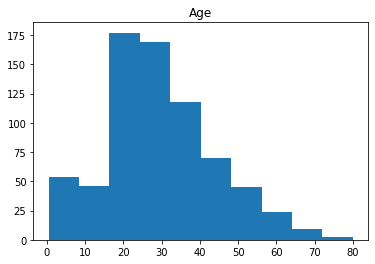

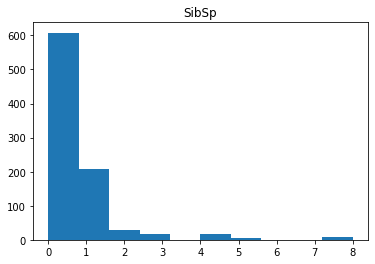

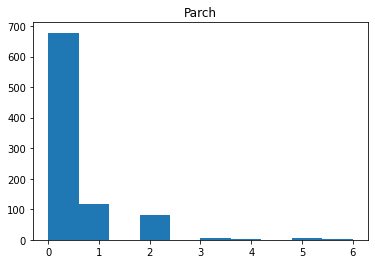

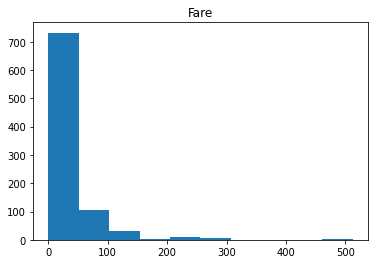

In [ ]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


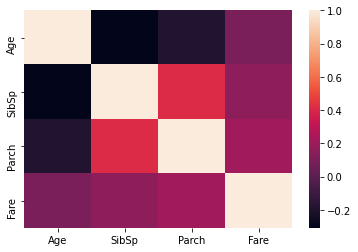

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [ ]:
# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(training, index= 'Survived', values=["Age","SibSp","Parch","Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


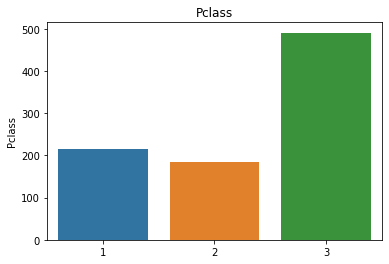

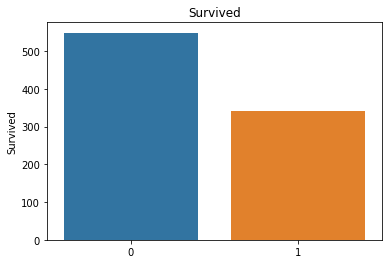

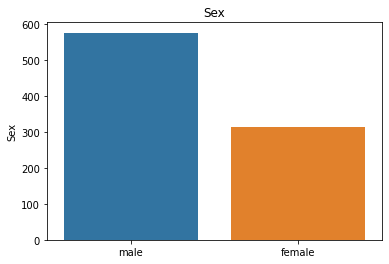

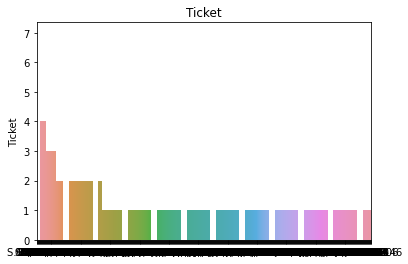

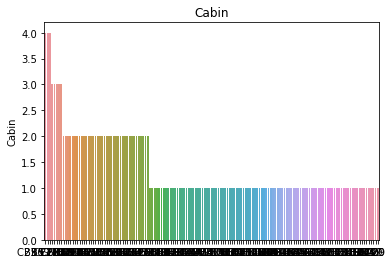

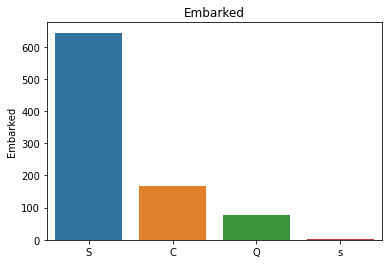

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()\

Cabin and ticket graphs are very messy. This is an area where we may want to do some feature engineering

In [ ]:
# Comparing survival and each of these categorical variables
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


#Feature Engineering


*   **Cabin** - Simplify cabins (evaluated if the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)
*   **Tickets** - Do different ticket types impact survival rates?
* **Title** - Does a person's title relate to survival rates?



In [39]:
df_cat['Cabin']
training["cabin_multiple"]= training['Cabin'].apply(lambda x: 0 if pd.isna(x)
else len(x.split(" ")) )
test["cabin_multiple"]= test['Cabin'].apply(lambda x: 0 if pd.isna(x)
else len(x.split(" ")) )
test['cabin_multiple'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: cabin_multiple, dtype: int64

In [ ]:
#survival rate on the basis of number of Cabins a person have
pd.pivot_table(training,index= "Survived", columns= "cabin_multiple", values= "Ticket", aggfunc= "count")

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [38]:
df_cat["Ticket"]
training["numeric_ticket"]= training["Ticket"].apply(lambda x:"yes" if x.isnumeric() 
else "NO")
test["numeric_ticket"]= test["Ticket"].apply(lambda x:"yes" if x.isnumeric() 
else "NO")
test["numeric_ticket"].value_counts()

yes    296
NO     122
Name: numeric_ticket, dtype: int64

In [ ]:
#survival rate across different ticket types
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,NO,yes
Survived,,
0,142,407
1,88,254


In [37]:
training['Name']
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['name_title'] = test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: name_title, dtype: int64

In [ ]:
#survival rate across different ticket types
pd.pivot_table(training,index='Survived',columns='name_title', values = 'Ticket', aggfunc='count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


##Feature Selection and Preprocession

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

In [40]:
training.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,numeric_ticket,name_title
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,4,NaN,2,17
top,NaN,NaN,NaN,"Byles, Rev. Thomas Roussel Davids",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S,NaN,yes,Mr
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN,661,517
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.267116,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.547134,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,0.000000,NaN,NaN


In [34]:
training["Age"]= training["Age"].fillna(training["Age"].median())
training["Embarked"]= training["Embarked"].replace("","s")
training.drop("train_test", axis=1, inplace= True)
test.drop("train_test", axis=1, inplace= True)

KeyError: ignored

In [41]:

x_train = training.drop(["PassengerId","Name","Ticket","Cabin","Survived"],axis= 1)
x_test = test.drop(["PassengerId","Name","Ticket","Cabin","Survived"],axis= 1)


In [42]:
x_test.describe(include="all")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,numeric_ticket,name_title
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,418,418.000000,418,418
unique,NaN,2,NaN,NaN,NaN,NaN,3,NaN,2,9
top,NaN,male,NaN,NaN,NaN,NaN,S,NaN,yes,Mr
freq,NaN,266,NaN,NaN,NaN,NaN,270,NaN,296,240
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN,0.282297,NaN,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN,0.628441,NaN,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN,0.000000,NaN,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN,0.000000,NaN,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN,0.000000,NaN,NaN


In [36]:
x_train.describe(include= "all")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,numeric_ticket
count,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,2,NaN,NaN,NaN,NaN,4,NaN,2
top,NaN,male,NaN,NaN,NaN,NaN,S,NaN,yes
freq,NaN,577,NaN,NaN,NaN,NaN,644,NaN,661
mean,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN,0.267116,NaN
std,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN,0.547134,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,0.000000,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,0.000000,NaN
75%,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,0.000000,NaN


In [43]:
y_train = training["Survived"].copy()
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
x_test.describe(include="all")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,numeric_ticket,name_title
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,418,418.000000,418,418
unique,NaN,2,NaN,NaN,NaN,NaN,3,NaN,2,9
top,NaN,male,NaN,NaN,NaN,NaN,S,NaN,yes,Mr
freq,NaN,266,NaN,NaN,NaN,NaN,270,NaN,296,240
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN,0.282297,NaN,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN,0.628441,NaN,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN,0.000000,NaN,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN,0.000000,NaN,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN,0.000000,NaN,NaN


#Pre-Processing of Data

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [45]:
column_trans= ColumnTransformer(transformers=[
    ("cat",OneHotEncoder(), ["numeric_ticket","Sex","Embarked","Pclass","cabin_multiple","name_title"]),
    ("num",StandardScaler(),["Age","SibSp","Parch","Fare"])
    ],
     remainder="passthrough",
     n_jobs=-1)
x= column_trans.fit_transform(x_train)
x = x.toarray()

In [46]:
x_test["Age"]= x_test["Age"].fillna(x_test["Age"].median())
x_test["Fare"]= x_test["Fare"].fillna(x_test["Fare"].median())
x_Test= column_trans.fit_transform(x_test)

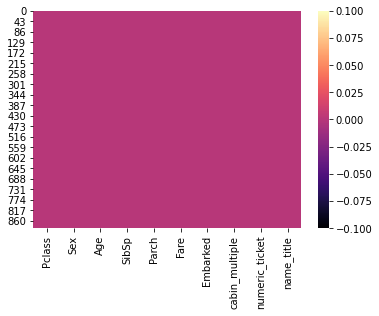

In [ ]:
import seaborn as sns
sns.heatmap(x_train.isnull(), cmap="magma")

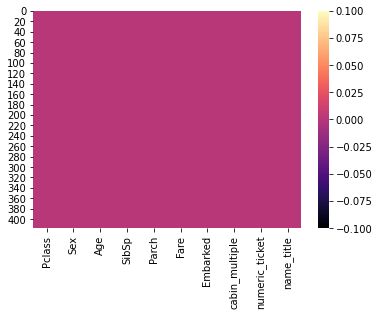

In [ ]:
sns.heatmap(x_test.isnull(), cmap="magma")

##Model Building##

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [48]:
gnb = GaussianNB()
#pip = Pipeline(steps=[('prep',column_trans), ('model', gnb)])
cv = cross_val_score(gnb,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61452514 0.62359551 0.66853933 0.6741573  0.62921348]
0.6420061515284665


In [49]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.79775281 0.80337079 0.81460674 0.87640449]
0.8249074132195091


In [50]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73184358 0.75842697 0.84269663 0.74157303 0.81460674]
0.7778293892411022


In [51]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79329609 0.78089888 0.8258427  0.82022472 0.85955056]
0.8159625886636117


In [52]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.7752809  0.84269663 0.75280899 0.8258427 ]
0.8013370158809867


In [53]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84916201 0.82022472 0.8258427  0.80898876 0.87078652]
0.8350009415604797


In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x,y_train,cv=5)
print(cv)
print(cv.mean()) 

[0.82122905 0.81460674 0.83707865 0.79213483 0.86516854]
0.8260435628648546


## Ensembling
Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers.A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such

In [55]:

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,x,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.81460674 0.83707865 0.79775281 0.85955056]
0.8293955181721173


#Scores Of different Models

     Model ---------------Scores
1.   Naive Bayes  -----   0.642
2.   Logistic Regression --  0.824
3. Decision Tree ------ 0.777
4. KNN   ------------- 0.815
5. Random Forest -------- 0.801
6.  Support Vector Classifier - 0.835
7. XGB Classifier -------- 0.8260




In [ ]:
test.head()
voting_clf.fit(x,y_train)
y_hat_base_vc = voting_clf.predict(x_Test).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
submission = pd.DataFrame(data=basic_submission)
submission.to_csv('submission.csv', index=False)

#Model Tuning

In [56]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [62]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [64]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(x,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Logistic Regression
Best Score: 0.8249011361496453
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.0s finished


In [67]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(x,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KNN
Best Score: 0.8204255853367648
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    2.3s finished


In [ ]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(x,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.9min
